

```
# Trabalho Prático ML - 01 Data Preparation
```

# Puc Minas - ML (Machine Learn)
# Pós Graduação - Big Data e Data Science
## Trabalho Prático 01 
Preparação de Dados

### Professor: 
Hugo Bastos de Paula

### Alunos: 
Tiago Henrique Pereira Fonseca

---


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

In [3]:
# 
# Init DataFrame
# 

automoveis_df = pd.read_excel('https://github.com/titilomt/data_science_puc_projects/raw/master/csv/automoveis.xlsx')

# Load Excel from URL and check head

automoveis_df.head()

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
0,alfa-romeo,gas,2.0,conversível,traseira,"168,80","64,10","48,80",dohc,4,"130,00",mpfi,"111,00","5000,00","13495,00"
1,alfa-romeo,gas,2.0,conversível,traseira,"168,80","64,10","48,80",dohc,4,"130,00",mpfi,"111,00","5000,00","16500,00"
2,alfa-romeo,gas,2.0,hatch,traseira,"171,20","65,50","52,40",ohcv,6,"152,00",mpfi,"154,00","5000,00","16500,00"
3,audi,gas,4.0,sedan,dianteira,"176,60","66,20","54,30",ohc,4,"109,00",mpfi,"102,00","5500,00","13950,00"
4,audi,gas,4.0,sedan,4x4,"176,60","66,40","54,30",ohc,5,"136,00",mpfi,"115,00","5500,00","17450,00"


In [4]:
# Display dataframe Info
# This allow us to decide which transformation our DataFrame will undergo
# 

automoveis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fabricante           203 non-null    object 
 1   Combustível          200 non-null    object 
 2   Portas               203 non-null    float64
 3   Estilo Chassis       205 non-null    object 
 4   Tração               205 non-null    object 
 5   Comprimento          205 non-null    object 
 6   Largura              205 non-null    object 
 7   Altura               205 non-null    object 
 8   Tipo de motor        205 non-null    object 
 9   Número de cilindros  205 non-null    object 
 10  Tamanho do motor     205 non-null    object 
 11  Tipo de injeção      205 non-null    object 
 12  Potência (HP)        205 non-null    object 
 13  Pico RPM             205 non-null    object 
 14  Preço                205 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

### DataType
Como podemos ver acima, nosso padrão de dados está pouco ilustrativo e teremos que transformar alguns atributos para que alguma lógica possa ser aplicada neste DataFrame.

### Atributos x Transformação x Tipo de Variável
| Coluna | Contagem de não nulos | Tipo de Dado | Transformação | Tipo de Variável |
| --- | --- | --- | --- | --- |
| Fabricante | 203 | Object | String | Categorical | 
| Combustível | 200 | Object | String | Categorical  |
| Portas | 203 | Float64 | N/A | Categorical |
| Estilo Chassis | 205 | Object | String | Categorical |
| Tração | 205 | Object | String | Categorical |
| Comprimento | 205 | Object | Float | Continuos Quantitative |
| Largura | 205 | Object | Float | Continuos Quantitative |
| Altura | 205 | Object | Float | Continuos Quantitative |
| Tipo de Motor | 205 | Object | String | Categorical |
| Número de Cilindros | 205 | Object | Float | Categorical |
| Tamanho do Motor | 205 | Object | Float | Continuos Quantitative |
| Tipo de Injeção | 205 | Object | String | Categorical |
| Potência (HP) | 205 | Object | Float | Continuos Quantitative |
| Pico RPM | 205 | Object | Float | Continuos Quantitative |
| Preço | 205 | Object | Float | Continuos Quantitative |

--- 

In [5]:
#
# Convert data to specified data type
#

automoveis_transform_df = automoveis_df.copy()

## 
# Function to convert possible case of number written as a word 
# 
def convert_numwrd(textnum):
  try: 
    return int(textnum)
  except (ValueError, TypeError):
    units = [
        "zero", "um", "dois", "tres", "quatro", "cinco", "seis", "sete", "oito",
        "nove", "dez", "onze", "doze", "treze", "quatorze", "quinze",
        "dezesseis", "dezessete", "dezoito", "dezenove"
    ]
    return units.index(textnum)

# Change the doors number to a more approachable way
portas = automoveis_transform_df['Portas']

doors_map = { 2: 'two', 4: 'four' }

new_portas = pd.Categorical([doors_map.get(p, None) for p in portas])

automoveis_transform_df['Fabricante'] = automoveis_transform_df['Fabricante'].astype('category')
automoveis_transform_df['Combustível'] = automoveis_transform_df['Combustível'].astype('category')
automoveis_transform_df['Portas'] = new_portas
automoveis_transform_df['Estilo Chassis'] = automoveis_transform_df['Estilo Chassis'].astype('category')
automoveis_transform_df['Tração'] = automoveis_transform_df['Tração'].astype('category')
automoveis_transform_df['Comprimento'] = automoveis_transform_df['Comprimento'].apply(lambda x: x.replace(',', '.') if type(x) is str else x).astype('float')
automoveis_transform_df['Largura'] = automoveis_transform_df['Largura'].apply(lambda x: x.replace(',', '.') if type(x) is str else x).astype('float')
automoveis_transform_df['Altura'] = automoveis_transform_df['Altura'].apply(lambda x: x.replace(',', '.') if type(x) is str else x).astype('float')
automoveis_transform_df['Tipo de motor'] = automoveis_transform_df['Tipo de motor'].astype('category')
automoveis_transform_df['Número de cilindros'] = automoveis_transform_df['Número de cilindros'].apply(lambda x: convert_numwrd(x))
automoveis_transform_df['Tamanho do motor'] = automoveis_transform_df['Tamanho do motor'].apply(lambda x: x.replace(',', '.') if type(x) is str else x).astype('float')
automoveis_transform_df['Tipo de injeção'] = automoveis_transform_df['Tipo de injeção'].astype('category')
automoveis_transform_df['Potência (HP)'] = automoveis_transform_df['Potência (HP)'].apply(lambda x: x.replace(',', '.') if type(x) is str else x).astype('float')
automoveis_transform_df['Pico RPM'] = automoveis_transform_df['Pico RPM'].apply(lambda x: x if type(x) is not str else x.replace(',', '.')).astype('float')
automoveis_transform_df['Preço'] = automoveis_transform_df['Preço'].apply(lambda x: x.replace(',', '.') if type(x) is str else x).astype('float')

automoveis_transform_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Fabricante           203 non-null    category
 1   Combustível          200 non-null    category
 2   Portas               203 non-null    category
 3   Estilo Chassis       205 non-null    category
 4   Tração               205 non-null    category
 5   Comprimento          205 non-null    float64 
 6   Largura              205 non-null    float64 
 7   Altura               205 non-null    float64 
 8   Tipo de motor        205 non-null    category
 9   Número de cilindros  205 non-null    int64   
 10  Tamanho do motor     205 non-null    float64 
 11  Tipo de injeção      205 non-null    category
 12  Potência (HP)        205 non-null    float64 
 13  Pico RPM             205 non-null    float64 
 14  Preço                205 non-null    float64 
dtypes: category(7), float64

In [6]:
#
# Nothing has change just the cells data type
# 
automoveis_transform_df.tail()

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
200,volvo,gas,four,sedan,traseira,188.8,68.9,55.5,ohcv,6,173.0,mpfi,134.0,5500.0,21485.0
201,volvo,diesel,four,sedan,traseira,188.8,68.9,55.5,ohc,6,145.0,idi,106.0,4800.0,22470.0
202,volvo,gas,four,sedan,traseira,188.8,68.9,55.5,ohc,4,141.0,mpfi,114.0,5400.0,22625.0
203,NaN,gas,four,sedan,traseira,176.8,64.8,54.3,ohc,6,164.0,mpfi,121.0,4250.0,21105.0
204,NaN,gas,two,hatch,traseira,169.0,65.7,49.6,rotor,2,70.0,4bbl,101.0,6000.0,10945.0


## Valores Omissos ou Inconsistentes
Agora vamos entender um pouco nossos dados, para saber qual a melhor maneira de tratar estes "buracos".

Temos valores faltantes em 'Fabricantes', 'Combustível' e 'Portas'. 
Todas estas colunas são valores Categoricos, precisamos de levantar alguma premissa para preencher as lacunas faltantes. 

In [7]:
# Verify all columns with null values

automoveis_transform_df.isnull().sum()

Fabricante             2
Combustível            5
Portas                 2
Estilo Chassis         0
Tração                 0
Comprimento            0
Largura                0
Altura                 0
Tipo de motor          0
Número de cilindros    0
Tamanho do motor       0
Tipo de injeção        0
Potência (HP)          0
Pico RPM               0
Preço                  0
dtype: int64

In [8]:
# As we got 3 columns with a low rate nullable entrys 
# lets go for 'the most frequent term' approach
# in each column

automoveis_transform_df['Fabricante'].fillna(automoveis_transform_df['Fabricante'].value_counts().index[0], inplace =True)
automoveis_transform_df['Combustível'].fillna(automoveis_transform_df['Combustível'].value_counts().index[0], inplace =True)
automoveis_transform_df['Portas'].fillna(automoveis_transform_df['Portas'].value_counts().index[0], inplace =True)

automoveis_transform_df.isnull().sum()

Fabricante             0
Combustível            0
Portas                 0
Estilo Chassis         0
Tração                 0
Comprimento            0
Largura                0
Altura                 0
Tipo de motor          0
Número de cilindros    0
Tamanho do motor       0
Tipo de injeção        0
Potência (HP)          0
Pico RPM               0
Preço                  0
dtype: int64

In [9]:
# Now that we got ride off missing values it's time to check our dataframe
print(automoveis_transform_df.describe())
print(automoveis_transform_df.info())

## we are good to go!

       Comprimento  Largura  Altura  Número de cilindros  Tamanho do motor  \
count       205.00   205.00  205.00               205.00            205.00   
mean        174.05    65.91   53.72                 4.38            126.91   
std          12.34     2.15    2.44                 1.08             41.64   
min         141.10    60.30   47.80                 2.00             61.00   
25%         166.30    64.10   52.00                 4.00             97.00   
50%         173.20    65.50   54.10                 4.00            120.00   
75%         183.10    66.90   55.50                 4.00            141.00   
max         208.10    72.30   59.80                12.00            326.00   

       Potência (HP)   Pico RPM     Preço  
count         205.00     205.00    205.00  
mean          104.26   10727.32  13207.13  
std            39.52   56645.35   7868.77  
min            48.00    4150.00   5118.00  
25%            70.00    4800.00   7788.00  
50%            95.00    5200.00  

### Deteccção de Outliers
Vamos passar por nossos dados numéricos para analisar como está a "saúde" de nossa coleção dentro do dataFrame

- Comprimento
- Largura
- Altura
- Núm. de cilindros
- Tam. do Motor

Registros com valores extremos:
   Fabricante Combustível Portas Estilo Chassis     Tração  Comprimento  \
17  chevrolet         gas    two          hatch  dianteira        141.1   

    Largura  Altura Tipo de motor  Número de cilindros  Tamanho do motor  \
17     60.3    53.2             l                    3              61.0   

   Tipo de injeção  Potência (HP)  Pico RPM   Preço  
17            2bbl           48.0    5100.0  5151.0  


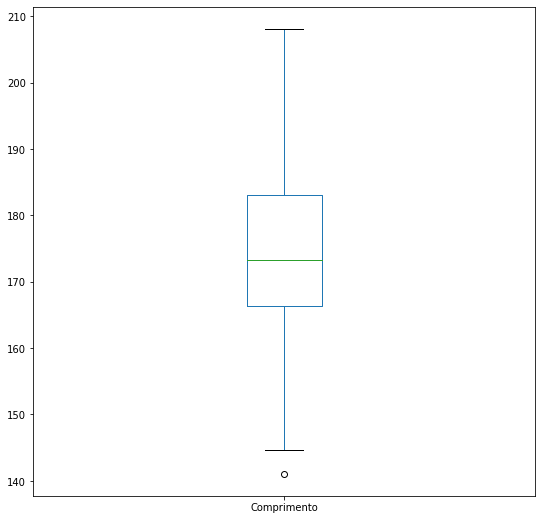

In [10]:
# Length 
automoveis_transform_df['Comprimento'].plot(kind="box", figsize=(9,9))

index = np.where(automoveis_transform_df['Comprimento'] == min(automoveis_transform_df['Comprimento']))

print('Registros com valores extremos:', automoveis_transform_df.loc[index], sep='\n')

Registros com valores extremos:
    Fabricante Combustível Portas Estilo Chassis    Tração  Comprimento  \
127    porsche         gas    two          hatch  traseira        175.7   

     Largura  Altura Tipo de motor  Número de cilindros  Tamanho do motor  \
127     72.3    50.5         dohcv                    8             203.0   

    Tipo de injeção  Potência (HP)  Pico RPM     Preço  
127            mpfi          288.0    5750.0  13207.13  


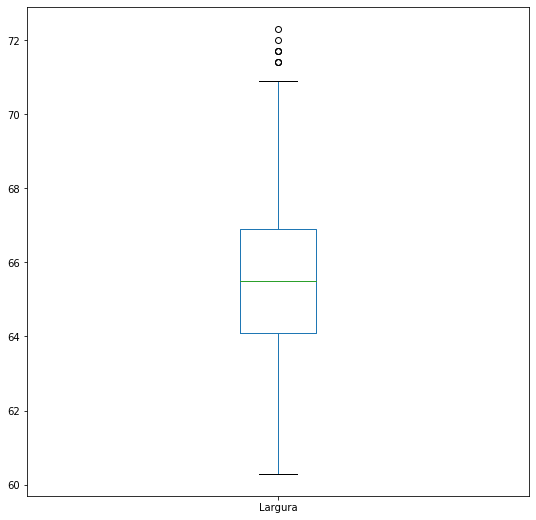

In [11]:
# Width 
automoveis_transform_df['Largura'].plot(kind="box", figsize=(9,9))

index = np.where(automoveis_transform_df['Largura'] == max(automoveis_transform_df['Largura']))

print('Registros com valores extremos:', automoveis_transform_df.loc[index], sep='\n')

Registros com valores extremos:
    Fabricante Combustível Portas Estilo Chassis     Tração  Comprimento  \
27       dodge         gas   four            suv  dianteira        174.6   
121   plymouth         gas   four            suv  dianteira        174.6   

     Largura  Altura Tipo de motor  Número de cilindros  Tamanho do motor  \
27      64.6    59.8           ohc                    4             122.0   
121     64.6    59.8           ohc                    4             122.0   

    Tipo de injeção  Potência (HP)  Pico RPM   Preço  
27             2bbl           88.0    5000.0  8921.0  
121            2bbl           88.0    5000.0  8921.0  


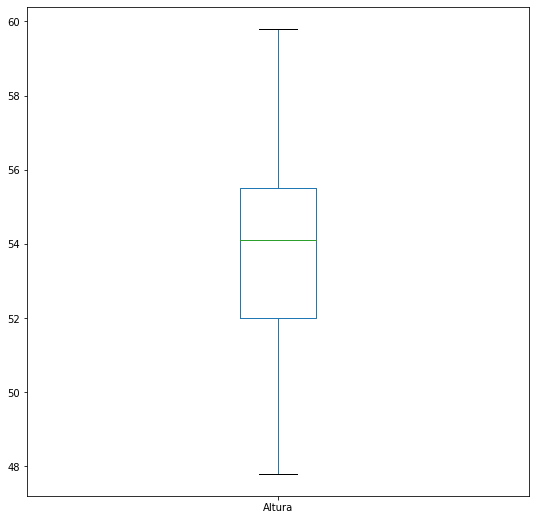

In [12]:
# Height
automoveis_transform_df['Altura'].plot(kind="box", figsize=(9,9))

index = np.where(automoveis_transform_df['Altura'] == max(automoveis_transform_df['Altura']))

print('Registros com valores extremos:', automoveis_transform_df.loc[index], sep='\n')

Registros com valores extremos:
   Fabricante Combustível Portas Estilo Chassis    Tração  Comprimento  \
48     jaguar         gas    two          sedan  traseira        191.7   

    Largura  Altura Tipo de motor  Número de cilindros  Tamanho do motor  \
48     70.6    47.8          ohcv                   12             326.0   

   Tipo de injeção  Potência (HP)  Pico RPM    Preço  
48            mpfi          262.0    5000.0  36000.0  


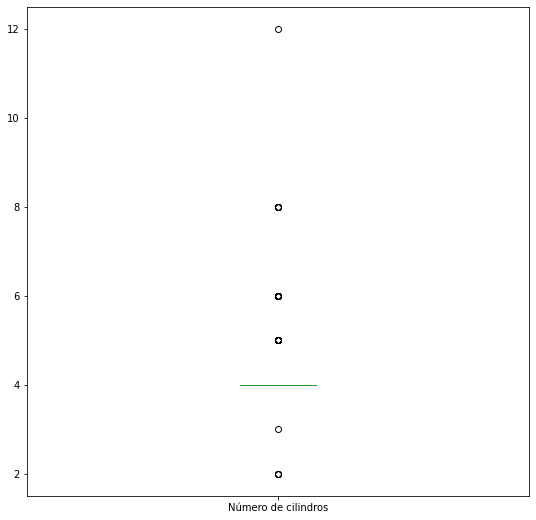

In [13]:
# Number of Cylinders
automoveis_transform_df['Número de cilindros'].plot(kind="box", figsize=(9,9))

index = np.where(automoveis_transform_df['Número de cilindros'] == max(automoveis_transform_df['Número de cilindros']))

print('Registros com valores extremos:', automoveis_transform_df.loc[index], sep='\n')

#### Cilindros de um veículo
Como podemos notar pelo gráfico de outliers, não foi uma boa escolha adotar esta variável como valor contínuo uma vez que temos um número finito de cilindros vale a pena considerá-lo como uma variável Categórica.

In [14]:
automoveis_transform_df['Número de cilindros'] = automoveis_transform_df['Número de cilindros'].astype('category')

In [15]:
automoveis_transform_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Fabricante           205 non-null    category
 1   Combustível          205 non-null    category
 2   Portas               205 non-null    category
 3   Estilo Chassis       205 non-null    category
 4   Tração               205 non-null    category
 5   Comprimento          205 non-null    float64 
 6   Largura              205 non-null    float64 
 7   Altura               205 non-null    float64 
 8   Tipo de motor        205 non-null    category
 9   Número de cilindros  205 non-null    category
 10  Tamanho do motor     205 non-null    float64 
 11  Tipo de injeção      205 non-null    category
 12  Potência (HP)        205 non-null    float64 
 13  Pico RPM             205 non-null    float64 
 14  Preço                205 non-null    float64 
dtypes: category(8), float64

Registros com valores extremos:
   Fabricante Combustível Portas Estilo Chassis    Tração  Comprimento  \
48     jaguar         gas    two          sedan  traseira        191.7   

    Largura  Altura Tipo de motor Número de cilindros  Tamanho do motor  \
48     70.6    47.8          ohcv                  12             326.0   

   Tipo de injeção  Potência (HP)  Pico RPM    Preço  
48            mpfi          262.0    5000.0  36000.0  


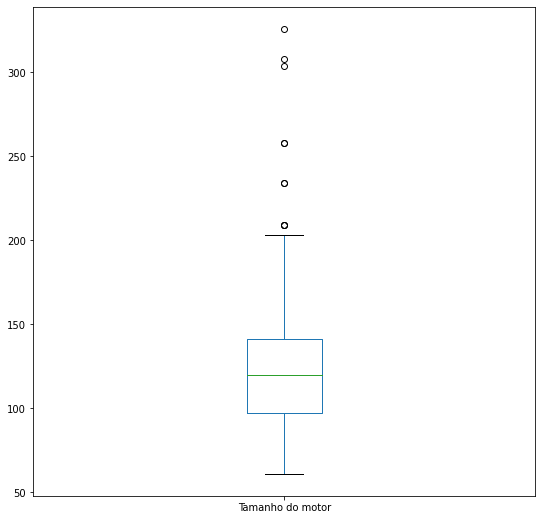

In [16]:
# Engine Size
automoveis_transform_df['Tamanho do motor'].plot(kind="box", figsize=(9,9))

index = np.where(automoveis_transform_df['Tamanho do motor'] == max(automoveis_transform_df['Tamanho do motor']))

print('Registros com valores extremos:', automoveis_transform_df.loc[index], sep='\n')

In [17]:
float_fields = automoveis_transform_df.dtypes[automoveis_transform_df.dtypes == 'float64'].index
corr = np.corrcoef(automoveis_transform_df[float_fields].transpose())
correlation = pd.DataFrame(data=corr, index=float_fields, columns=float_fields)

print("\Matriz de correlação dos atributos float:\n{}".format(correlation))

\Matriz de correlação dos atributos float:
                  Comprimento  Largura  Altura  Tamanho do motor  \
Comprimento              1.00     0.84    0.49              0.68   
Largura                  0.84     1.00    0.28              0.74   
Altura                   0.49     0.28    1.00              0.07   
Tamanho do motor         0.68     0.74    0.07              1.00   
Potência (HP)            0.55     0.64   -0.11              0.81   
Pico RPM                 0.02    -0.05    0.02             -0.05   
Preço                    0.68     0.73    0.13              0.86   

                  Potência (HP)  Pico RPM  Preço  
Comprimento            5.54e-01  1.97e-02   0.68  
Largura                6.42e-01 -5.32e-02   0.73  
Altura                -1.10e-01  2.07e-02   0.13  
Tamanho do motor       8.11e-01 -4.72e-02   0.86  
Potência (HP)          1.00e+00 -7.09e-03   0.76  
Pico RPM              -7.09e-03  1.00e+00   0.04  
Preço                  7.58e-01  4.30e-02   1.00  


### Conclusões
Podemos identificar certos padrões em cima de nossos atributos, se considerar que uma forte correlação entre atributos de ser acima de 0.75. 

Temos uma ligação interessante entre o Tamanho do Motor com o Preço do veículo, índice de 0.86: 
- Carros com motores maiores tendem a ter um custo de fabricação maior

Podemos tirar como conclusão, também baseando no Preço, a relação com a Potência (HP) cujo índice é de 0.76:
- A potência do veículo depende das peças que seu motor é fabricado, normalmente carros com maior potência tem um peso maior em suas peças que compõem o motor, gerando assim preço maior

In [18]:
print("\nDimensões:\n{0}\n".format(automoveis_transform_df.shape))
print("\nCampos:\n{0}\n".format(list(automoveis_transform_df.keys())))
print("\nTipos dos dados:\n{0}\n".format(automoveis_transform_df.dtypes))
print(automoveis_transform_df.describe(percentiles=[]))


Dimensões:
(205, 15)


Campos:
['Fabricante', 'Combustível', 'Portas', 'Estilo Chassis', 'Tração', 'Comprimento', 'Largura', 'Altura', 'Tipo de motor', 'Número de cilindros', 'Tamanho do motor', 'Tipo de injeção', 'Potência (HP)', 'Pico RPM', 'Preço']


Tipos dos dados:
Fabricante             category
Combustível            category
Portas                 category
Estilo Chassis         category
Tração                 category
Comprimento             float64
Largura                 float64
Altura                  float64
Tipo de motor          category
Número de cilindros    category
Tamanho do motor        float64
Tipo de injeção        category
Potência (HP)           float64
Pico RPM                float64
Preço                   float64
dtype: object

       Comprimento  Largura  Altura  Tamanho do motor  Potência (HP)  \
count       205.00   205.00  205.00            205.00         205.00   
mean        174.05    65.91   53.72            126.91         104.26   
std          12.3

### Preparando a BASE para o Treinamento

Base de treinamento:(164, 6)
Base de teste:(41, 6)


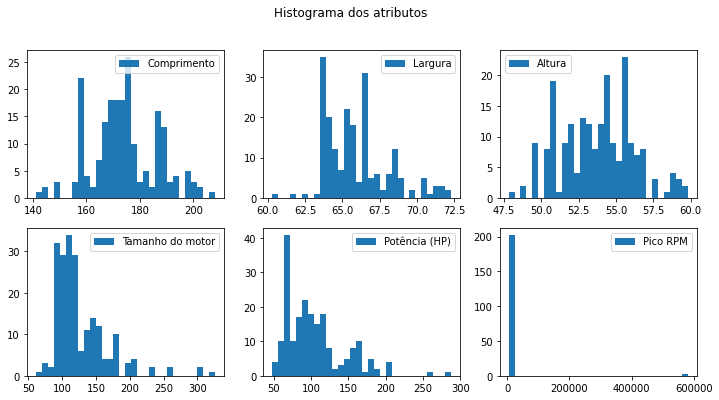

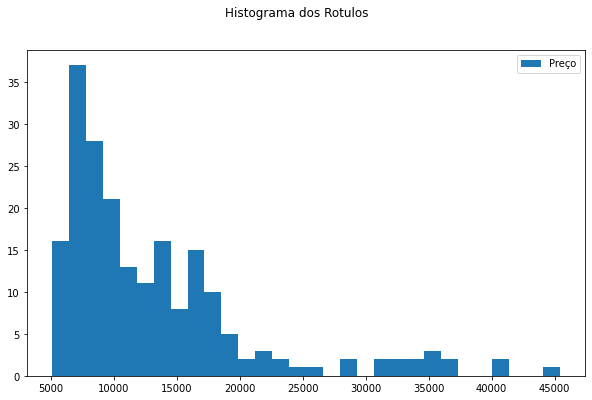

In [63]:
train_auto_df = pd.DataFrame({ 
    'Comprimento': automoveis_transform_df['Comprimento'],
    'Largura': automoveis_transform_df['Largura'],
    'Altura': automoveis_transform_df['Altura'],
    'Tamanho do motor': automoveis_transform_df['Tamanho do motor'],
    'Potência (HP)': automoveis_transform_df['Potência (HP)'],
    'Pico RPM': automoveis_transform_df['Pico RPM'],
    'Preço': automoveis_transform_df['Preço']
})

X = train_auto_df.iloc[:, 0:(train_auto_df.shape[1] - 1)]

y = train_auto_df.iloc[:,(train_auto_df.shape[1] - 1)]

# Recupera os nomes dos atributos

atributos = list(train_auto_df)[0:(train_auto_df.shape[1] - 1)]
rotulo = list(train_auto_df)[(train_auto_df.shape[1] - 1)]

# Exibe o histograma dos atributos.
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
plt.suptitle("Histograma dos atributos")

for i in range(0, 2):
    for j in range(0, 3):
        ax[i, j].hist(X.iloc[:,(i*3 + j)], label=atributos[i*3+j], bins=30)
        ax[i, j].legend()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.suptitle("Histograma dos Rotulos")
ax.hist(y.iloc[:],label=rotulo,bins=30)            
ax.legend()


# Amostragem de dados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Base de treinamento:{0}".format(X_train.shape))
print("Base de teste:{0}".format(X_test.shape))


### Treinamento por REGRESSÃO LINEAR

In [64]:
lnr = LinearRegression()

lnr.fit(X_train, y_train)

y_prev = lnr.predict(X_test)

print("Acurácia da base de treinamento: {:.2f}".format(lnr.score(X_train, y_train)))
print("Acurácia da base de testes: {:.2f}".format(lnr.score(X_test, y_test)))

print("Descrição do modelo: ")
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr.coef_)]
print("w: {}  b: {:.2f}".format(s, lnr.intercept_))
print("Número de atributos usados: {}".format(np.sum(lnr.coef_ != 0)))

Acurácia da base de treinamento: 0.78
Acurácia da base de testes: 0.75
Descrição do modelo: 
w: ['Comprimento: 46.89', 'Largura: 451.99', 'Altura: 117.15', 'Tamanho do motor: 113.84', 'Potência (HP): 26.19', 'Pico RPM: 0.01']  b: -48375.90
Número de atributos usados: 6


Erro percentual:
 Média: 0.19  Max: 0.58   Min: 0.01


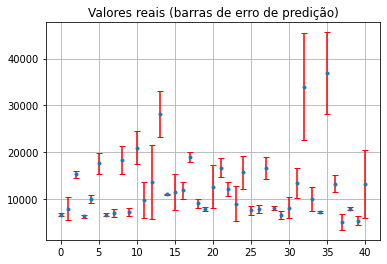

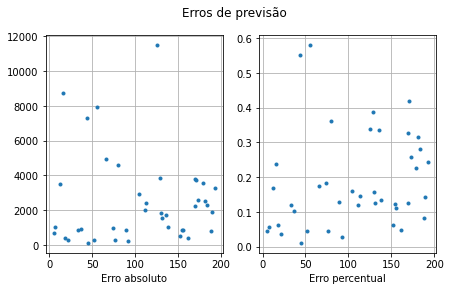

In [65]:
# Calcula o erro absoluto e o erro percentual da regressao linear
errolnr = np.abs(y_test - y_prev)
erroperc = errolnr / list(y_test)

print('Erro percentual:\n Média: {0:.2f}  Max: {1:.2f}   Min: {2:.2f}'
      .format(np.mean(erroperc), np.max(erroperc), np.min(erroperc)))

plt.figure(figsize=(6, 4))
plt.errorbar(np.arange(y_test.size), list(y_test), yerr=errolnr,
             fmt='.', ecolor='r', capsize=3)
plt.title("Valores reais (barras de erro de predição)")
plt.grid()

fig, ax = plt.subplots(1, 2, figsize=(7, 4))
plt.suptitle("Erros de previsão")
ax[0].plot(errolnr,'.')
ax[0].set_xlabel("Erro absoluto")
ax[0].grid()
ax[1].plot(erroperc,'.')
ax[1].set_xlabel("Erro percentual")
ax[1].grid()

### TRANSFORMAÇÃO DE DADOS NUMÉRICOS

Transformação dos atributos numérico passando por normalização logarítmica

Text(0.5, 1.0, 'log_10(Preço)')

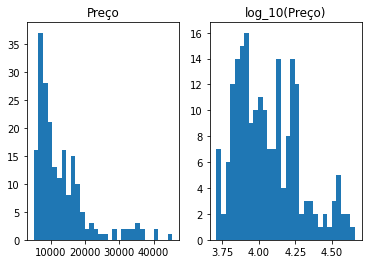

In [69]:
# Os atributos possuem faixas de valores diferentes, que influencia os pesos 
# dos coeficientes da regressão. Vamos trabalhar melhor os atributos.

X_scale = X.copy()

# Iremos aplicar o logaritmo em "Potência (HP)", "Tamanho do motor" e "Preço".

X_scale['Potência (HP)'] = np.log10(X['Potência (HP)'])
X_scale['Tamanho do motor'] = np.log10(X['Tamanho do motor'])
y_scale = np.log10(y)

# Normalização Min-Max dos dados.

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_scale)
X_scale = min_max_scaler.transform(X_scale)

fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].hist(y,bins=30, label='Preço')
ax[0].set_title('Preço')
ax[1].hist(y_scale,bins=30, label='log10(Preço)')
ax[1].set_title('log_10(Preço)')


--------------- Regressão Linear Normalizada ---------------
Acurácia da base de treinamento: 0.80
Acurácia da base de testes: 0.78
Descrição do modelo: 
w: ['Comprimento: 0.19', 'Largura: 0.22', 'Altura: 0.02', 'Tamanho do motor: 0.38', 'Potência (HP): 0.39', 'Pico RPM: 0.19']  b: 3.51

------------------  Comparação de pesos   ------------------
Original:
 w: ['Comprimento: 46.89', 'Largura: 451.99', 'Altura: 117.15', 'Tamanho do motor: 113.84', 'Potência (HP): 26.19', 'Pico RPM: 0.01']  b: -48375.90
Normalizado:
 w: ['Comprimento: 0.19', 'Largura: 0.22', 'Altura: 0.02', 'Tamanho do motor: 0.38', 'Potência (HP): 0.39', 'Pico RPM: 0.19']  b: 3.51


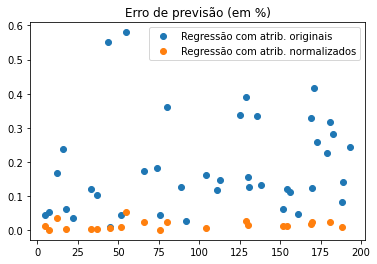

In [72]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scale, y_scale, test_size=0.1, random_state=0)

lnr2 = LinearRegression().fit(X_train2, y_train2)

y_prev2 = lnr2.predict(X_test2)

errolnr2 = np.abs(y_test2 - y_prev2)
errolnr2perc = np.abs(y_test2 - y_prev2)/y_test2
plt.figure(figsize=(6, 4))
plt.plot(erroperc,'o', label='Regressão com atrib. originais')
plt.plot(errolnr2perc,'o', label='Regressão com atrib. normalizados')
plt.title("Erro de previsão (em %)")
plt.legend()

print("\n--------------- Regressão Linear Normalizada ---------------")
print("Acurácia da base de treinamento: {:.2f}".format(lnr2.score(X_train2, y_train2)))
print("Acurácia da base de testes: {:.2f}".format(lnr2.score(X_test2, y_test2)))
print("Descrição do modelo: ")
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr2.coef_)]
print("w: {}  b: {:.2f}".format(s, lnr2.intercept_))


print("\n------------------  Comparação de pesos   ------------------")
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr.coef_)]
print("Original:\n w: {}  b: {:.2f}".format(s, lnr.intercept_))
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr2.coef_)]
print("Normalizado:\n w: {}  b: {:.2f}".format(s, lnr2.intercept_))

# Conclusão Final

Preparamos nossa base para usar o algoritmo de Regressão Linear, usamos como variável pivor o Preço dos carros que apresenta correlações com outros atributos, entretanto identificamos que nosso resultado da performance do modelo estava bem baixo. 

Ao analisar os gráficos de Histograma, podemos identificar que os atributos que mais se corelacionam estavam apresentando os dados assímetricos, que é considerado um ajuste ruim.

Para tentar corrigir este erro, usamos um algoritmo, do tipo logaritmo, para 'consertar' estas curvas. Com isto nosso histograma ficou normalizado e por consequência melhorou a performance de nosso modelo de predição.